In [1]:
from google.colab import drive

In [2]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
import numpy as np
import pandas as pd
import cv2
import os

In [4]:
drive.mount('/content/drive')#connect drive to colab

Mounted at /content/drive


In [5]:
Datadir='/content/drive/MyDrive/DataSetDodCat/PetImages'
category=["Dog","Cat"]
dataset=[]
size=120
ct=0;
ct1=0
for types in category:
    path=os.path.join(Datadir,types)
    ex=0
    for img in os.listdir(path):
        if types=='Dog':
            ex=1
            ct=ct+1;
        else :
            ct1=ct1+1;
            ex=0
        try :
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img=cv2.resize(img_arr ,(size,size),interpolation=cv2.INTER_AREA)
            dataset.append([new_img,ex])
        except Exception as e:
            pass

In [6]:
import random

12485


10657

In [7]:
random.shuffle(dataset)

In [8]:
X=[]
Y=[]
for features,label in dataset:
  X.append(features)
  Y.append(label)

In [9]:
X=np.array(X).reshape(-1,size,size,1)

In [21]:
model=Sequential()
model.add(Flatten(input_shape=(120,120)))
model.add(Dense(14400,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_4 (Dense)             (None, 14400)             207374400 
                                                                 
 dense_5 (Dense)             (None, 10)                144010    
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 207,518,542
Trainable params: 207,518,542
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# check points

In [24]:

from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
filepath="/content/drive/MyDrive/saved_models/CatvsDog-{epoch:02d}-{val_accuracy:.2f}.hdf5"

# save the model with the best validation (development) accuracy till now
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#
earlystopping = EarlyStopping(monitor='val_loss',patience=8,verbose=1)

logcsv = CSVLogger('mycsvcatvsdog',separator=',',append=False)

callback_list=[checkpoint,earlystopping,logcsv]

In [25]:
Yt=np.array(Y)
from sklearn.model_selection import train_test_split
#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Yt, test_size = 0.2)
history=model.fit(X_train,y_train,epochs=20,validation_split=0.2,callbacks=callback_list)

Epoch 1/20
462/462 [==============================] - ETA: 0s - loss: 24.9708 - accuracy: 0.5265
Epoch 1: val_accuracy improved from -inf to 0.55384, saving model to /content/drive/MyDrive/saved_models/CatvsDog-01-0.55.hdf5
462/462 [==============================] - 567s 1s/step - loss: 24.9708 - accuracy: 0.5265 - val_loss: 0.6886 - val_accuracy: 0.5538
Epoch 2/20
462/462 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5363
Epoch 2: val_accuracy did not improve from 0.55384
462/462 [==============================] - 544s 1s/step - loss: 0.6906 - accuracy: 0.5363 - val_loss: 0.6878 - val_accuracy: 0.5538
Epoch 3/20
462/462 [==============================] - ETA: 0s - loss: 0.6906 - accuracy: 0.5363
Epoch 3: val_accuracy did not improve from 0.55384
462/462 [==============================] - 539s 1s/step - loss: 0.6906 - accuracy: 0.5363 - val_loss: 0.6880 - val_accuracy: 0.5538
Epoch 4/20
462/462 [==============================] - ETA: 0s - loss: 0.6906 - accura

In [34]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

In [35]:
import matplotlib.pyplot as plt

In [36]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.538644728296168

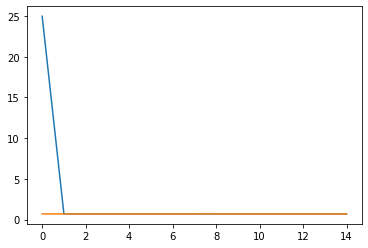

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

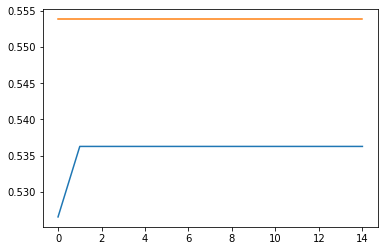

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])